# Klasifikassi Teks Tanpa Word2Vec

In [1]:
_= !pip install jcopml

In [2]:
import pandas as pd #pandas
import numpy as np #numpy

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/farisulhaq/dataset/main/pta_final.csv')

In [4]:
df

,stem,label
0,sistem informasi akademik siakad sistem inform...,rpl
1,berjalannya koneksi jaringan komput lancar gan...,rpl
2,web server perangkat lunak server berfungsimen...,rpl
3,seir perkembangan teknolog didunia muncul tekn...,komputasi
4,gerak pekerja game memiliki genr rt realtim st...,komputasi
...,...,...
591,investasi saham memiliki resiko kerugian dikar...,komputasi
592,inform retriev ir pengambilan informasi tersim...,pba
593,klasifikasi citra prose pengelompokan piksel c...,komputasi
594,identifikasi atribut pejalan kaki salah peneli...,komputasi


## Dataset split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.stem
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape

((476,), (120,))

## Training Model

In [8]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import CountVectorizer

In [9]:
pipeline = Pipeline([
    ('prep', CountVectorizer()),
    ('algo', SVC(max_iter=500))
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(f'best_parameter: {model.best_params_}')
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


best_parameter: {'algo__C': 3.5849855803404798, 'algo__gamma': 0.0018997763474111289}
1.0 0.8025210084033614 0.7833333333333333


## Evaluasi

In [10]:
from jcopml.plot import plot_confusion_matrix

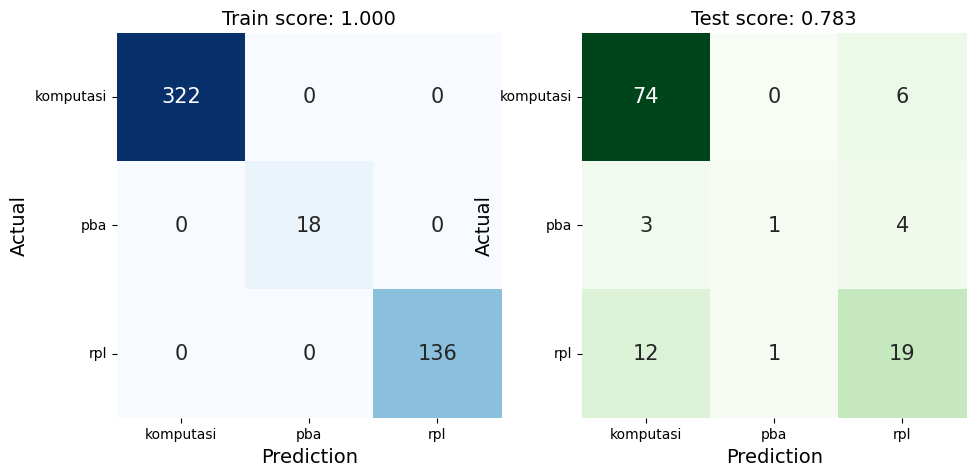

In [11]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)